In [90]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import clear_output
np.set_printoptions(suppress=True)

from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling  import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import f1_score, precision_recall_curve, fbeta_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import LinearSVC, SVC

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from mlxtend.plotting import plot_decision_regions
%matplotlib inline
%precision 3

'%.3f'

In [35]:
# pickle file from stroke eda notebook

with open('stage_1_data','rb') as read_file:
    df_stroke = pickle.load(read_file)

In [99]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,doesnt smoke,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,doesnt smoke,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,doesnt smoke,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,doesnt smoke,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,doesnt smoke,0


In [37]:
df_stroke.smoking_status.value_counts()

never smoked       28612
formerly smoked     7093
smokes              6226
Name: smoking_status, dtype: int64

In [38]:
df_stroke['smoking_status'] = df_stroke.smoking_status.map({'never smoked': 'doesnt smoke', 'formerly smoked': 'doesnt smoke', 'smokes': 'smokes'})

In [39]:
df_stroke.smoking_status.value_counts()

doesnt smoke    35705
smokes           6226
Name: smoking_status, dtype: int64

In [40]:
df_stroke.stroke.value_counts()

0    41288
1      643
Name: stroke, dtype: int64

## Create dummy columns

In [41]:
df_dummies = pd.get_dummies(df_stroke)

In [42]:
df_dummies.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_doesnt smoke', 'smoking_status_smokes'],
      dtype='object')

In [43]:
df_dummies = df_dummies.drop('id', axis = 1)

In [44]:
df_modeling = df_dummies.copy()

In [45]:
X = df_modeling.drop('stroke', axis = 1)
y = df_modeling.stroke

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)


In [47]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_doesnt smoke,smoking_status_smokes
24598,47.0,0,0,214.99,33.0,1,0,1,0,0,0,1,0,0,1,0,1,0
34380,53.0,0,0,239.67,29.2,1,0,0,1,0,0,1,0,0,1,0,1,0
25053,70.0,0,0,91.35,29.5,0,1,0,1,0,0,0,1,0,0,1,1,0
39715,48.0,0,0,110.62,28.1,0,1,0,1,1,0,0,0,0,1,0,1,0
15132,75.0,0,0,98.90,23.5,1,0,0,1,0,0,1,0,0,1,0,1,0


In [48]:
y_test.value_counts()

0    8239
1     148
Name: stroke, dtype: int64

## Fixing unbalanced classes

In [49]:
ros = RandomOverSampler(random_state=30)
smote = SMOTE(random_state=30)
ada = ADASYN(random_state=30)

X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)
X_train_ada, y_train_ada = ada.fit_sample(X_train,y_train)

lr_ros = LogisticRegression(solver='liblinear', max_iter = 400)
lr_smote = LogisticRegression(solver='liblinear', max_iter = 400)
lr_ada = LogisticRegression(solver='liblinear', max_iter = 400)

lr_ros.fit(X_train_ros, y_train_ros)
lr_smote.fit(X_train_smote, y_train_smote)
lr_ada.fit(X_train_ada, y_train_ada)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=400, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
print('ROS: ', recall_score(y_test, lr_ros.predict(X_test)))
print('SMOTE: ', recall_score(y_test, lr_smote.predict(X_test)))
print('ADASYN: ', recall_score(y_test, lr_ada.predict(X_test)))
print(confusion_matrix(y_test, lr_ros.predict(X_test), labels=[1,0]))

ROS:  0.8445945945945946
SMOTE:  0.831081081081081
ADASYN:  0.8378378378378378
[[ 125   23]
 [2123 6116]]


In [51]:
def choosing_oversampler(model_list):
    for model in model_list:
        print(type(model).__name__)
        print('ROS: ', np.mean(cross_val_score(model, X_train_ros, y_train_ros, cv=5, scoring='recall')))
        print('SMOTE: ', np.mean(cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='recall')))
        print('ADASYN: ', np.mean(cross_val_score(model, X_train_ada, y_train_ada, cv=5, scoring='recall')))
        print('')

In [52]:
choosing_oversampler([KNeighborsClassifier(n_neighbors=3), LogisticRegression(solver = 'liblinear', max_iter = 400), 
                      DecisionTreeClassifier(), RandomForestClassifier(n_estimators = 100, n_jobs = -1)])

KNeighborsClassifier
ROS:  1.0
SMOTE:  0.9958546418959704
ADASYN:  0.925098276383429

LogisticRegression
ROS:  0.8141247952123234
SMOTE:  0.8164848053667247
ADASYN:  0.8089204717266405

DecisionTreeClassifier
ROS:  1.0
SMOTE:  0.9839031129100304
ADASYN:  0.9641366797701844

RandomForestClassifier
ROS:  1.0
SMOTE:  0.9849621693610396
ADASYN:  0.9723918959782282



#### It seems like random over sampler generally works well. Let's run some naive models


In [110]:
def print_classification_metrics(model_list, X_test, y_test):
    for model in model_list:
        predictions = model.predict(X_test)
        recall = recall_score(y_test, predictions)
        specificity = recall_score(y_test, predictions, pos_label = 0)
        print(type(model).__name__)
        print('Precision: ', precision_score(y_test, predictions))
        print('Recall: ', recall)
        print('Specificity: ', specificity)
        print('F1 Score: ', f1_score(y_test, predictions))
        print('Accuracy: ', accuracy_score(y_test, predictions))
        print('ROC: ', roc_auc_score(y_test, predictions))
        print(confusion_matrix(y_test, predictions))
        print('Custom score: ', 2*recall*specificity/(recall+specificity))
        print('')

In [111]:
#Logistic Regression
model_log = LogisticRegression(solver='liblinear', max_iter = 400, C=0.01)
model_log.fit(X_train_ros, y_train_ros)

#kNN
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train_ros, y_train_ros)

#Bernoulli Bayes
nb_bern = BernoulliNB()
nb_bern.fit(X_train_ros, y_train_ros)

#Gaussian Bayes
nb_gauss = GaussianNB()
nb_gauss.fit(X_train_ros, y_train_ros)

#Random Forest
model_forest = RandomForestClassifier(n_estimators=100)
model_forest.fit(X_train_ros, y_train_ros)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [112]:
print_classification_metrics([model_log, model_knn, nb_bern, nb_gauss, model_forest], X_test, y_test)

LogisticRegression
Precision:  0.05572755417956656
Recall:  0.8513513513513513
Specificity:  0.7408666100254885
F1 Score:  0.1046077210460772
Accuracy:  0.7428162632645762
ROC:  0.79610898068842
[[6104 2135]
 [  22  126]]
Custom score:  0.7922756870182219

KNeighborsClassifier
Precision:  0.05343511450381679
Recall:  0.0945945945945946
Specificity:  0.9698992596188858
F1 Score:  0.06829268292682926
Accuracy:  0.9544533206152379
ROC:  0.5322469271067402
[[7991  248]
 [ 134   14]]
Custom score:  0.17237718545408603

BernoulliNB
Precision:  0.027175208581644815
Recall:  0.7702702702702703
Specificity:  0.5046728971962616
F1 Score:  0.052498273083122264
Accuracy:  0.5093597233814237
ROC:  0.637471583733266
[[4158 4081]
 [  34  114]]
Custom score:  0.6098068350668647

GaussianNB
Precision:  0.027286413248024086
Recall:  0.9797297297297297
Specificity:  0.37261803616943806
F1 Score:  0.05309410472354449
Accuracy:  0.3833313461309169
ROC:  0.6761738829495839
[[3070 5169]
 [   3  145]]
Custom 

## Graphing separability

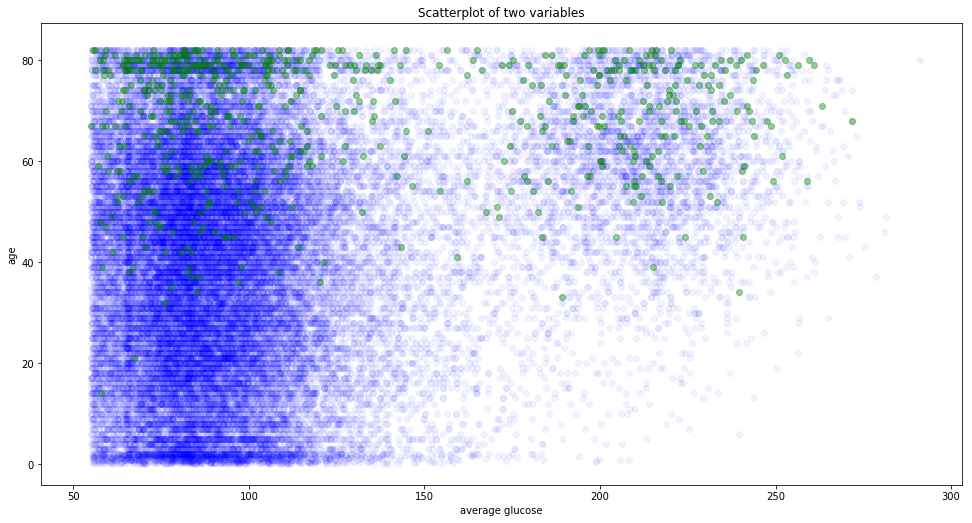

In [82]:
df_nostroke = df_stroke[df_stroke.stroke == 0]
df_yesstroke = df_stroke[df_stroke.stroke == 1]

fig, ax = plt.subplots()
ax.scatter(df_nostroke.avg_glucose_level, df_nostroke.age, c='blue', alpha = 0.05)
ax.scatter(df_yesstroke.avg_glucose_level, df_yesstroke.age, c='green', alpha = 0.4)

plt.xlabel('average glucose')
plt.ylabel('age')
plt.title('Scatterplot of two variables')
fig.set_size_inches(16.5, 8.5)

(array([  1.,   1.,   4.,  15.,  24.,  48.,  84.,  92., 117., 257.]),
 array([14. , 20.8, 27.6, 34.4, 41.2, 48. , 54.8, 61.6, 68.4, 75.2, 82. ]),
 <a list of 10 Patch objects>)

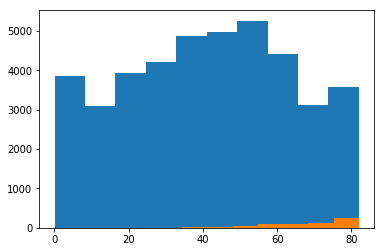

In [81]:
plt.hist(df_nostroke.age)
plt.hist(df_yesstroke.age)

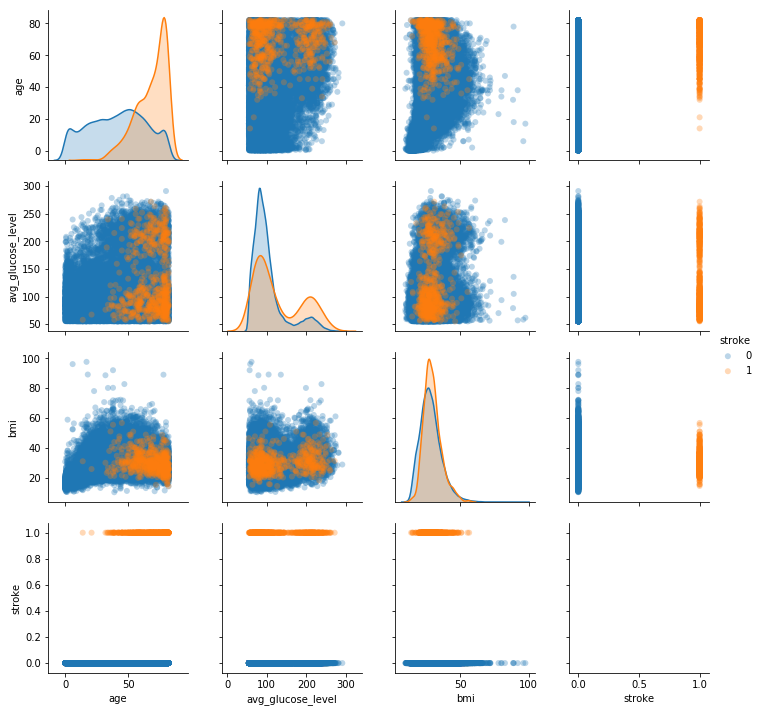

In [80]:
sns.pairplot(df_stroke.drop(['id', 'hypertension', 'heart_disease'], axis = 1), hue='stroke', plot_kws=dict(alpha=.3, edgecolor='none'))

### Engineering Stroke data to take forest model

In [4]:
model_forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
df_modeling.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,0,1,1,0,0,0,0,0,1,1,0,0
1,58.0,1,0,87.96,39.2,0,0,1,0,1,0,0,1,0,0,0,1,0
2,8.0,0,0,110.89,17.6,0,1,0,1,0,0,0,1,0,0,0,1,0
3,70.0,0,0,69.04,35.9,0,1,0,0,1,0,0,1,0,0,1,0,0
4,14.0,0,0,161.28,19.1,0,0,1,1,0,0,1,0,0,0,1,0,0


In [84]:
test_case = np.array([75, 1, 39, 1, 0, 1, 0, 0, 1])
test_case

array([75,  1, 39,  1,  0,  1,  0,  0,  1])

In [23]:
model_forest.predict_proba(test_case.reshape(1, 9))[0][1]

0.7586299367281952

In [29]:
np.array(df_modeling.iloc[1,:])

array([58.  ,  1.  ,  0.  , 87.96, 39.2 ,  0.  ,  0.  ,  1.  ,  0.  ,
        1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
        1.  ,  0.  ])

In [58]:
df_modeling.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_doesnt smoke', 'smoking_status_smokes'],
      dtype='object')

In [59]:
df_modeling = df_modeling.drop('smoking_status_doesnt smoke', axis = 1)

In [62]:
df_forest_input = df_modeling.loc[:, ['age', 'smoking_status_smokes', 'bmi', 'hypertension', 'gender_Female', 'gender_Male',
                                      'avg_glucose_level']]
df_forest_input.head()

,age,smoking_status_smokes,bmi,hypertension,gender_Female,gender_Male,avg_glucose_level
0,3.0,0,18.0,0,0,1,95.12
1,58.0,0,39.2,1,0,1,87.96
2,8.0,0,17.6,0,1,0,110.89
3,70.0,0,35.9,0,1,0,69.04
4,14.0,0,19.1,0,0,1,161.28


In [69]:
def convert_glucose(cell):
    if cell < 100:
        return 'normal'
    if (cell >= 100) & (cell <=125):
        return 'above_average'
    else:
        return 'high'

In [70]:
df_forest_input.avg_glucose_level = df_forest_input.avg_glucose_level.apply(lambda x: convert_glucose(x))

In [92]:
df_forest_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41931 entries, 0 to 43399
Data columns (total 9 columns):
age                                41931 non-null float64
smoking_status_smokes              41931 non-null uint8
bmi                                41931 non-null float64
hypertension                       41931 non-null int64
gender_Female                      41931 non-null uint8
gender_Male                        41931 non-null uint8
avg_glucose_level_above_average    41931 non-null uint8
avg_glucose_level_high             41931 non-null uint8
avg_glucose_level_normal           41931 non-null uint8
dtypes: float64(2), int64(1), uint8(6)
memory usage: 1.5 MB


In [73]:
df_forest_input = pd.get_dummies(df_forest_input)

In [75]:
df_forest_input.head()

,age,smoking_status_smokes,bmi,hypertension,gender_Female,gender_Male,avg_glucose_level_above_average,avg_glucose_level_high,avg_glucose_level_normal
0,3.0,0,18.0,0,0,1,0,0,1
1,58.0,0,39.2,1,0,1,0,0,1
2,8.0,0,17.6,0,1,0,1,0,0
3,70.0,0,35.9,0,1,0,0,0,1
4,14.0,0,19.1,0,0,1,0,1,0


### Attention: Don't run the cell below - it will take about 90-120 minutes. This creates the engineered feature

In [93]:
probability_list = []
counter = 0
for index, row in df_forest_input.iterrows():
    clear_output(wait=True)
    probability_list.append(model_forest.predict_proba(np.array(row).reshape(1, 9))[0][1])
    print('Rows checked: ', counter)
    counter += 1

Rows checked:  41930


In [96]:
df_modeling['heart_disease_prob'] = probability_list

In [98]:
with open('modeling_data_final', 'wb') as to_write:
    pickle.dump(df_modeling, to_write)